<h2 style="color:green" align="center">Would a person buy life insurnace based on  one variable (age) using logistic regression</h2>

This is binary logistic regression problem as there are only two possible outcomes (person buys insurance or doesn't). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


## EDA

In [3]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [12]:
# check missing values
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

GOOD. No missing values

C:\Users\hi\AppData\Local\Temp\ipykernel_20052\4009942018.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


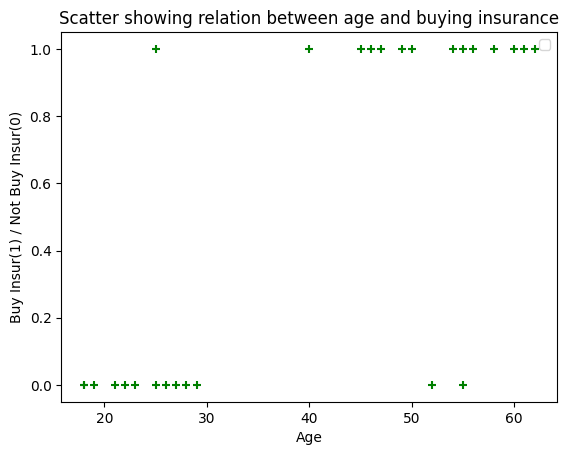

In [44]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='green')
# Labels and title
plt.xlabel("Age")
plt.ylabel("Buy Insur(1) / Not Buy Insur(0)")
plt.title("Scatter showing relation between age and buying insurance")
plt.legend()
plt.show()

### Observation: Generally people over 40 are buy insurance and younger people do not.
It follows a sigmoid function curve.

#### Split data into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [11]:
print(X_train.shape)
print(X_test.shape)

(21, 1)
(6, 1)


So 21 records are for training and 6 for testing. Not a huge dataset, but it would show proof of concept.

In [13]:
X_test

,age
17,58
15,55
1,25
4,46
24,50
19,18


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(X_train, y_train) # This line of code would train your model

LogisticRegression()

### Let test the model
lets see how the model performs on the test dataset

In [39]:
X_test

,age
17,58
15,55
1,25
4,46
24,50
19,18


In [40]:
y_predicted = model.predict(X_test)
print(y_predicted)

[1 1 0 1 1 0]


Lets put the actual value and predicted values next to each other so we can see it better

In [41]:
# Create a DataFrame for better visualization
comparison_df = pd.DataFrame({'Actual': y_test, 
                              'Predicted': y_predicted}
)

print(comparison_df)


    Actual  Predicted
17       1          1
15       1          1
1        0          0
4        1          1
24       1          1
19       0          0


In [18]:
model.predict_proba(X_test)

array([[0.11574291, 0.88425709],
       [0.15581227, 0.84418773],
       [0.85155016, 0.14844984],
       [0.3410176 , 0.6589824 ],
       [0.24657425, 0.75342575],
       [0.92748406, 0.07251594]])

### First number above is the prob of it being 0, and the next number is prob of it being 1.

In [19]:
model.score(X_test,y_test) # show the accuracy of our model. Ideally this should be 1, but realistically it woule be below 1

1.0

c:\Users\hi\Desktop\projects\python_projects\ai_projects\tutorial\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


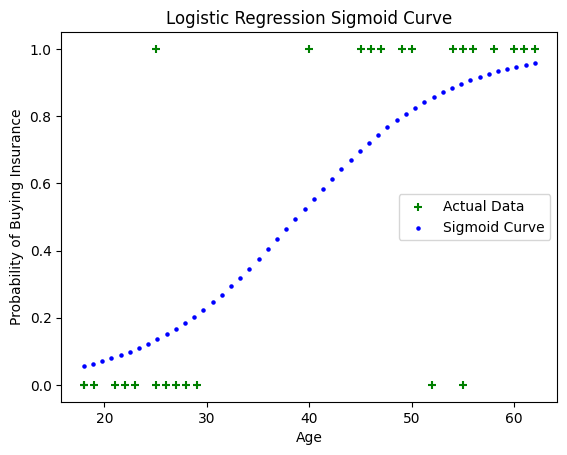

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define feature and target variables
X = df[['age']]  # Feature (2D array)
y = df['bought_insurance']  # Target (0 or 1)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

# Generate smooth age values for the sigmoid curve
age_range = np.linspace(df.age.min(), df.age.max(), 50).reshape(-1, 1)# create 50 ages

# Predict probabilities using the trained model
probabilities = model.predict_proba(age_range)[:, 1]  # Probability of class 1

# Plot the scatter plot
plt.scatter(df.age, df.bought_insurance, marker='+', color='green', label="Actual Data")

# Plot the sigmoid curve(probability curve)
plt.scatter(age_range, probabilities, color='blue', s=5, label="Sigmoid Curve")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.title("Logistic Regression Sigmoid Curve")
plt.legend()
plt.show()


### Lets calculate the if a 35 year old person is going to buy insur ? 

In [63]:
age = 25
age_2Darray = np.array([[age]])  # Convert to 2D array

probability = model.predict_proba(age_2Darray)[0, 1]  # Probability of buying insurance
print(f"Probability of buying insurance for age {age}: {probability:.2f}")

predicted_value = model.predict(age_2Darray)
print(f"Prediction for a {age}-year-old: {predicted_value[0]}")

Probability of buying insurance for age 25: 0.13
Prediction for a 25-year-old: 0


c:\Users\hi\Desktop\projects\python_projects\ai_projects\tutorial\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\hi\Desktop\projects\python_projects\ai_projects\tutorial\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


He would NOT buy insurance because his probability of buying insurance is just 0.37, and not buying is 1-0.37=0.63 

## The Math
Lets see if the math predicts the same value.

![title](logistic_reg_formula.jpg)

Here p(X) is the probability that X belongs to a category
b0, b1 are the values that are found by logisticregression method above.

In [64]:
b0 = model.intercept_
b1 = model.coef_
print(b0)
print(b1)

[-5.26279121]
[[0.13546543]]


In [67]:
import math
def logistic_function(z):
  return math.exp(-z) / (1 + math.exp(-z))

age=25
z = b0 + b1*age
y = logistic_function(z)
print(y) # prob of NOT buying insur
print(1-y) # prob of buying insur


0.8671689056073125
0.13283109439268748


C:\Users\hi\AppData\Local\Temp\ipykernel_20052\2473214581.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.exp(-z) / (1 + math.exp(-z))


### Good . This value matches with above.